# **Library and Models Import**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import GridSearchCV , train_test_split , StratifiedShuffleSplit , StratifiedKFold, cross_val_score , RepeatedStratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,classification_report,roc_curve

import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier


# **Reading Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path1 = "/content/drive/MyDrive/Colab Data/brain_stroke.csv"
df = pd.read_csv(path1)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


# **Preprocessing of dataset**

### Checking for missing values

In [ ]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Checking the type of each columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


### Looking for the categorical columns which needs to be LabelEncoded

In [ ]:
categorical_columns = []
for col in df.columns:
  if(df[col].dtype == object):
    categorical_columns.append(col)
categorical_columns 

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [ ]:
numerical_columns = []
for col in df.columns:
  if(df[col].dtype != object):
    numerical_columns.append(col)
numerical_columns 

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

# **Exploratory Data Analysis**

### Checking if there exist any imbalance in the dataset or not

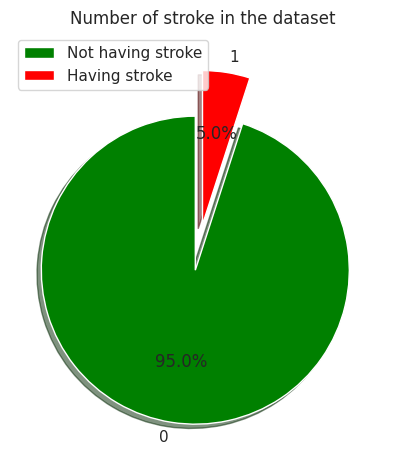

In [ ]:
labels = df['stroke'].value_counts(sort = True).index
sizes = df['stroke'].value_counts(sort = True)
colors = ["green","red"]
expd = (0.3,0) 
plt.figure(figsize=(5,5))
plt.pie(sizes,explode=expd,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=90)
plt.title('Number of stroke in the dataset')
plt.legend(["Not having stroke" , "Having stroke"])
plt.show()

# **Categorical Columns**

### For all the features lets see the variation of numbers against the target variable 'stroke'

<Axes: xlabel='gender', ylabel='count'>

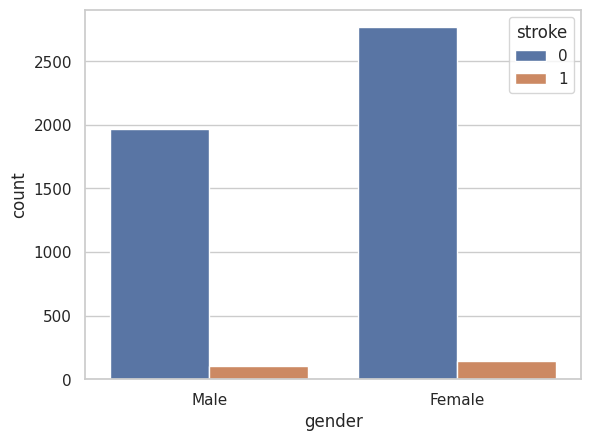

In [ ]:
sns.countplot(x='gender', hue='stroke', data=df)

In [ ]:
df['gender'].value_counts()

Female    2907
Male      2074
Name: gender, dtype: int64

<Axes: xlabel='heart_disease', ylabel='count'>

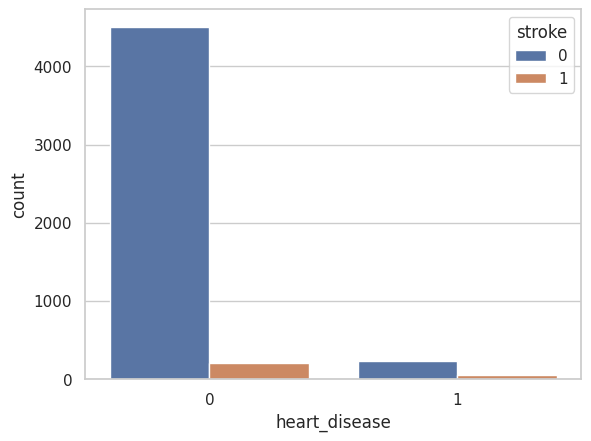

In [ ]:
sns.countplot(x='heart_disease', hue='stroke', data=df)

<Axes: xlabel='ever_married', ylabel='count'>

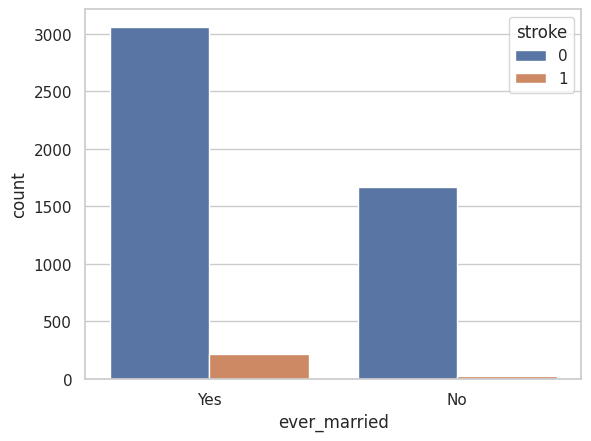

In [ ]:
sns.countplot(x='ever_married', hue='stroke', data=df)

<Axes: xlabel='work_type', ylabel='count'>

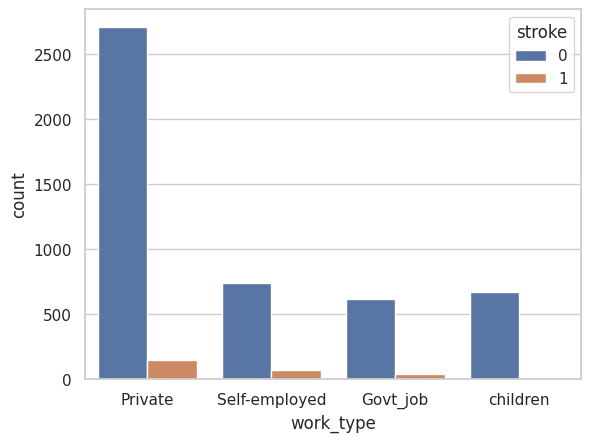

In [ ]:
sns.countplot(x='work_type', hue='stroke', data=df)

<Axes: xlabel='smoking_status', ylabel='count'>

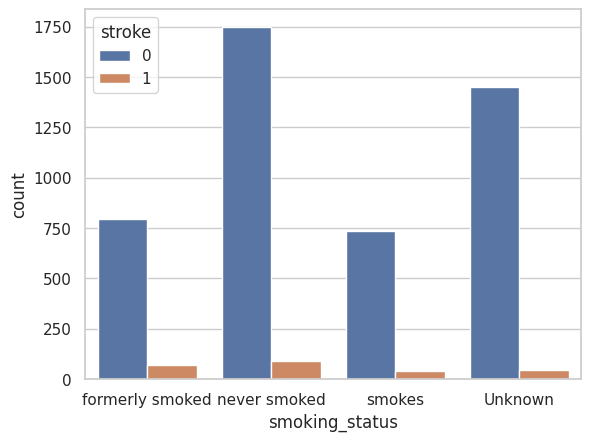

In [ ]:
sns.countplot(x='smoking_status', hue='stroke', data=df)

<Axes: xlabel='Residence_type', ylabel='count'>

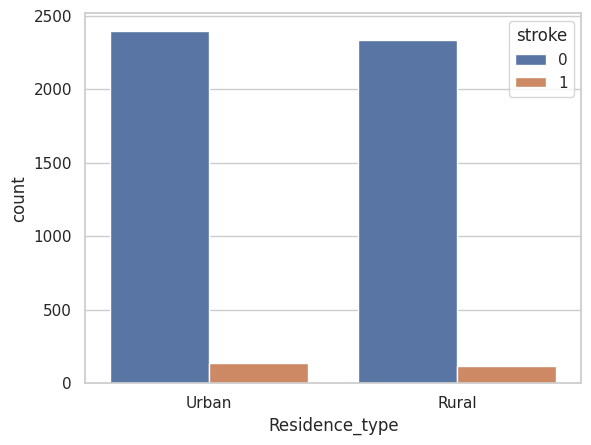

In [ ]:

sns.countplot(x='Residence_type', hue='stroke', data=df)

# **Continuous Columns**

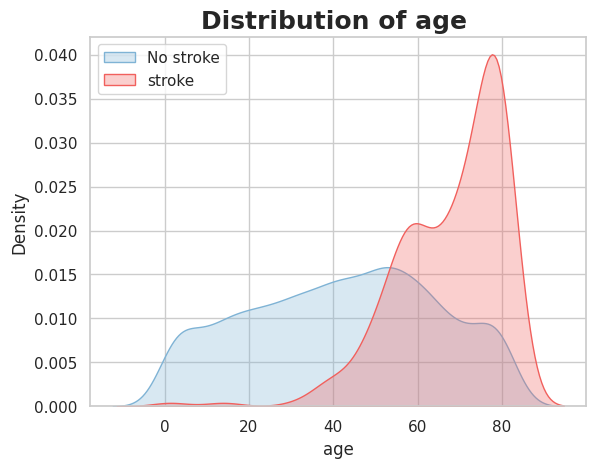

In [ ]:
sns.kdeplot(data=df[df['stroke']==0],x='age',color='#7FB3D5', fill=True,alpha=0.3)
sns.kdeplot(data=df[df['stroke']==1],x='age',color='#F1605D', fill=True,alpha=0.3)
plt.title("Distribution of age ",fontdict={'fontweight': 'bold', 'size':18})
plt.legend(['No stroke' , 'stroke'],loc = 'upper left')
     

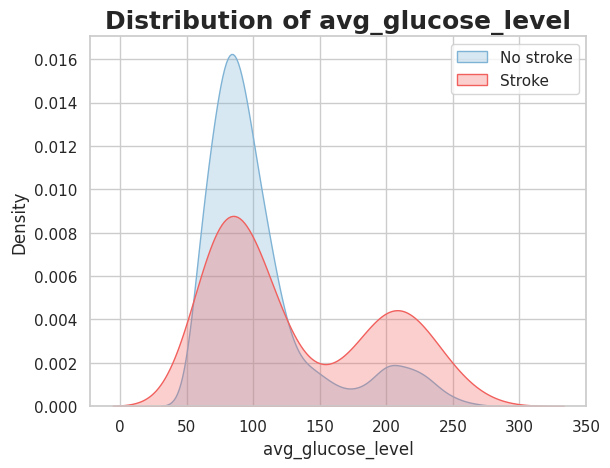

In [ ]:
sns.kdeplot(data=df[df['stroke']==0],x='avg_glucose_level',color='#7FB3D5', fill=True,alpha=0.3)
sns.kdeplot(data=df[df['stroke']==1],x='avg_glucose_level',color='#F1605D', fill=True,alpha=0.3)
plt.title("Distribution of avg_glucose_level",fontdict={'fontweight': 'bold', 'size':18})
plt.legend(['No stroke' , 'Stroke'],loc = 'upper right')


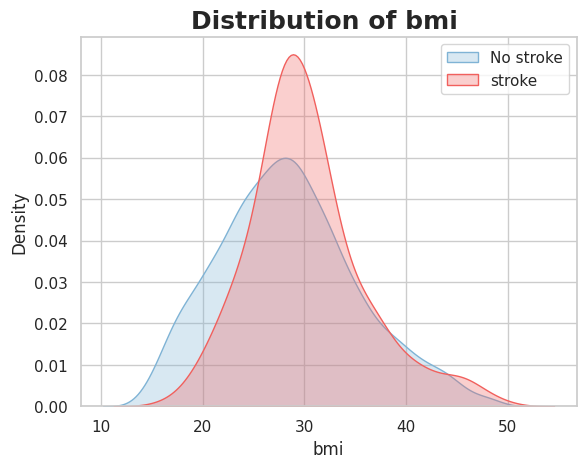

In [ ]:
sns.kdeplot(data=df[df['stroke']==0],x='bmi',color='#7FB3D5', fill=True,alpha=0.3)
sns.kdeplot(data=df[df['stroke']==1],x='bmi',color='#F1605D', fill=True,alpha=0.3)
plt.title("Distribution of bmi ",fontdict={'fontweight': 'bold', 'size':18})
plt.legend(['No stroke' , 'stroke'],loc = 'upper right')

[]

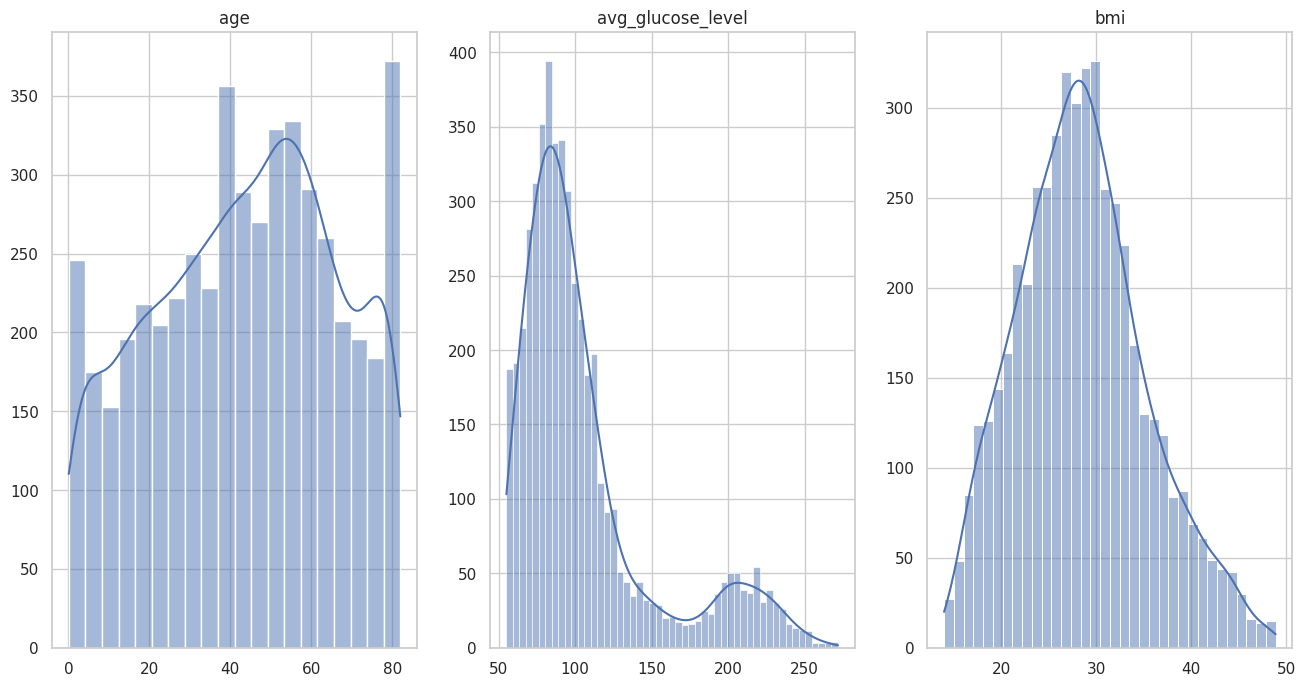

In [ ]:
cols = ['age', 'avg_glucose_level', 'bmi']
plt.figure(figsize = (16, 8))
idx = 0
for i in cols:
    plt.subplot(1,3,idx+1)
    sns.histplot(x = df[i],kde = True)
    plt.ylabel(None)
    plt.title(i)
    plt.xlabel(None)
    idx+=1
    
plt.plot()

# **Feature Engineering**

# Encoding Categorical columns

In [ ]:
for col in categorical_columns:
  encoder= LabelEncoder()
  df[col] = encoder.fit_transform(df[col])
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,1,0,70.15,29.8,1,0
4977,1,40.0,0,0,1,1,1,191.15,31.1,3,0
4978,0,45.0,1,0,1,0,0,95.02,31.8,3,0
4979,1,40.0,0,0,1,1,0,83.94,30.0,3,0


# Dealing with continuous columns

In [ ]:
numerical_columns

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

In [ ]:
to_remove =['stroke','hypertension','heart_disease']
for i in to_remove :
  numerical_columns.remove(i)

In [ ]:
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,1.040584,0,1,1,1,1,2.723411,1.193238,1,1
1,1,1.614270,0,1,1,1,0,-0.000523,0.589390,2,1
2,0,0.246250,0,0,1,1,1,1.448529,0.869222,3,1
3,0,1.570141,1,0,1,2,0,1.512650,-0.662492,2,1
4,1,1.658400,0,0,1,1,1,1.780895,0.073909,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,-0.106788,0,0,0,1,0,-0.794162,0.191733,1,0
4977,1,-0.150917,0,0,1,1,1,1.890500,0.383197,3,0
4978,0,0.069731,1,0,1,0,0,-0.242364,0.486294,3,0
4979,1,-0.150917,0,0,1,1,0,-0.488199,0.221189,3,0


# Splitting data in training(80%) and testing(20%) using stratified split method

In [ ]:
X = df.drop('stroke', axis=1)
y =df['stroke']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# **Training multiple models without taking care of imbalanced dataset**

In [ ]:
models = [LogisticRegression() ,
          DecisionTreeClassifier(), 
          RandomForestClassifier(),
          BernoulliNB(),
          GaussianNB(),
          SVC(),
          KNeighborsClassifier(),
          GradientBoostingClassifier(),
          AdaBoostClassifier(),
          xgb.XGBClassifier()]
model_names = ['LogisticRegression',
               'DecisionTreeClassifier',
               'RandomForestClassifier',
               'BernoulliNB',
               'GaussianNB',
               'Support Vector Machine',
               'K-Nearest Neighbors',
               'GradientBoostingClassifier',
               'AdaBoost',
               'XGBClassifier',
               'LightGBM']
Precision = []
Recall = []
ROC = []
F1 = []
     


In [ ]:
def training_summary(x_train, y_train, x_test, y_test, model_name , model):
  model.fit(x_train, y_train)
  prediction = model.predict(x_test)
  precision = precision_score(y_test, prediction)*100
  recall = recall_score(y_test, prediction)*100
  roc = roc_auc_score(y_test,prediction)*100
  f1 = f1_score(y_test,prediction)*100
  Precision.append(precision)
  Recall.append(recall)
  ROC.append(roc)
  F1.append(f1)

In [ ]:
def evaluate_classifiers(x_train,y_train,x_test,y_test):
  training_summary(x_train,y_train, x_test, y_test, 'LogisticRegression',LogisticRegression())
  training_summary(x_train,y_train, x_test, y_test, 'DecisionTreeClassifier',DecisionTreeClassifier())
  training_summary(x_train,y_train, x_test, y_test, 'RandomForestClassifier',RandomForestClassifier(n_estimators=50,n_jobs=-1))   
  training_summary(x_train,y_train, x_test, y_test, 'BernoulliNB',BernoulliNB())
  training_summary(x_train,y_train, x_test, y_test, 'GaussianNB',GaussianNB())
  training_summary(x_train,y_train, x_test, y_test, 'Support Vector Machine',SVC())
  training_summary(x_train,y_train, x_test, y_test, 'K-Nearest Neighbors',KNeighborsClassifier(n_neighbors=1,algorithm='kd_tree',weights='uniform'))
  training_summary(x_train,y_train, x_test, y_test, 'GradientBoostingClassifier',GradientBoostingClassifier(learning_rate=0.1,loss='exponential',max_depth=70,
                          max_features=2,n_estimators=300))
  training_summary(x_train,y_train, x_test, y_test, 'AdaBoost', AdaBoostClassifier(n_estimators=100, base_estimator=DecisionTreeClassifier(max_depth=1)))
  training_summary(x_train,y_train, x_test, y_test, 'XGBClassifier',xgb.XGBClassifier())
  training_summary(x_train,y_train,x_test,y_test, 'LightGBM',lgb.LGBMClassifier())

In [ ]:
evaluate_classifiers(X_train,y_train,X_test,y_test)

In [ ]:
model_names

['LogisticRegression',
 'DecisionTreeClassifier',
 'RandomForestClassifier',
 'BernoulliNB',
 'GaussianNB',
 'Support Vector Machine',
 'K-Nearest Neighbors',
 'GradientBoostingClassifier',
 'AdaBoost',
 'XGBClassifier',
 'LightGBM']

In [ ]:
compare_classifiers = pd.DataFrame({'Model': model_names, 'Precision': Precision, 'Recall': Recall, 'ROC_AUC_Score' : ROC,'F1_score' : F1})
compare_classifiers.style.background_gradient(high=1,axis=0)

,Model,Precision,Recall,ROC_AUC_Score,F1_score
0,LogisticRegression,0.000000,0.000000,50.000000,0.000000
1,DecisionTreeClassifier,13.043478,12.000000,53.888068,12.500000
2,RandomForestClassifier,0.000000,0.000000,49.947202,0.000000
3,BernoulliNB,11.111111,4.000000,51.155227,5.882353
4,GaussianNB,13.274336,30.000000,59.825766,18.404908
5,Support Vector Machine,0.000000,0.000000,50.000000,0.000000
6,K-Nearest Neighbors,6.818182,6.000000,50.835269,6.382979
7,GradientBoostingClassifier,0.000000,0.000000,49.788807,0.000000
8,AdaBoost,0.000000,0.000000,49.841605,0.000000
9,XGBClassifier,0.000000,0.000000,49.419219,0.000000


# **Defining object of SMOTE() and again using stratified split**

In [ ]:
smote = SMOTE()
X_smote , y_smote = smote.fit_resample(X,y)

data_smote = pd.concat([X_smote, y_smote],axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, stratify=y_smote)

In [ ]:
data_smote

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,1.040584,0,1,1,1,1,2.723411,1.193238,1,1
1,1,1.614270,0,1,1,1,0,-0.000523,0.589390,2,1
2,0,0.246250,0,0,1,1,1,1.448529,0.869222,3,1
3,0,1.570141,1,0,1,2,0,1.512650,-0.662492,2,1
4,1,1.658400,0,0,1,1,1,1.780895,0.073909,1,1
...,...,...,...,...,...,...,...,...,...,...,...
9461,0,1.644088,0,0,1,2,0,-0.372824,-1.392930,2,1
9462,0,1.528962,0,0,0,0,1,0.002565,-0.181212,0,1
9463,1,1.292812,0,0,1,1,0,-0.011573,-0.191195,1,1
9464,0,0.506402,1,0,1,0,0,-0.693138,0.415802,2,1


In [ ]:
class_counts = data_smote['stroke'].value_counts()
class_counts

1    4733
0    4733
Name: stroke, dtype: int64

# **Visualising our SMOTE dataset**

Text(0.5, 1.0, 'SMOTE Data')

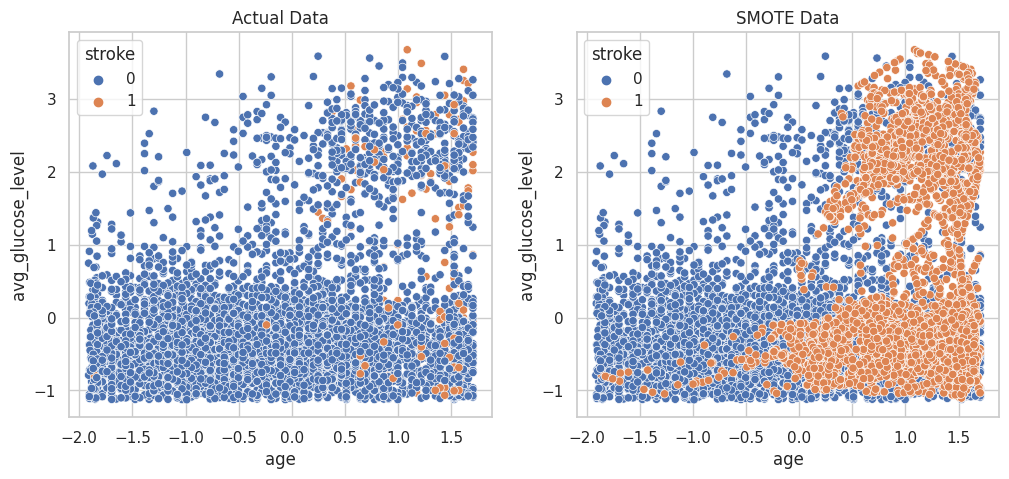

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(data=df,x='age',y='avg_glucose_level',hue='stroke',ax=ax[0])\
.set_title("Actual Data")
sns.scatterplot(data=data_smote,x='age',y='avg_glucose_level',hue='stroke',ax=ax[1])\
.set_title("SMOTE Data")

In [ ]:
Precision = []
Recall = []
ROC = []
F1 = []

# **Modelling via SMOTE**

In [ ]:
evaluate_classifiers(X_train,y_train,X_test,y_test)

In [ ]:
compare_classifiers = pd.DataFrame({'Model': model_names, 'Precision': Precision, 'Recall': Recall, 'ROC_AUC_Score' : ROC,'F1_score' : F1})
compare_classifiers.style.background_gradient(high=1,axis=0)

,Model,Precision,Recall,ROC_AUC_Score,F1_score
0,LogisticRegression,77.192982,83.632524,79.461457,80.283832
1,DecisionTreeClassifier,88.004137,89.862724,88.806758,88.923720
2,RandomForestClassifier,91.308691,96.515312,93.664203,93.839836
3,BernoulliNB,65.393609,88.595565,70.855333,75.246637
4,GaussianNB,72.592593,82.787751,75.765576,77.355698
5,Support Vector Machine,80.149813,90.390707,84.002112,84.962779
6,K-Nearest Neighbors,87.428571,96.937698,91.499472,91.937907
7,GradientBoostingClassifier,93.061224,96.304118,94.561774,94.654904
8,AdaBoost,78.633301,86.272439,81.414995,82.275932
9,XGBClassifier,94.909862,94.508976,94.720169,94.708995


# Visualising the Recall and see which is greatest and most accurate to use.

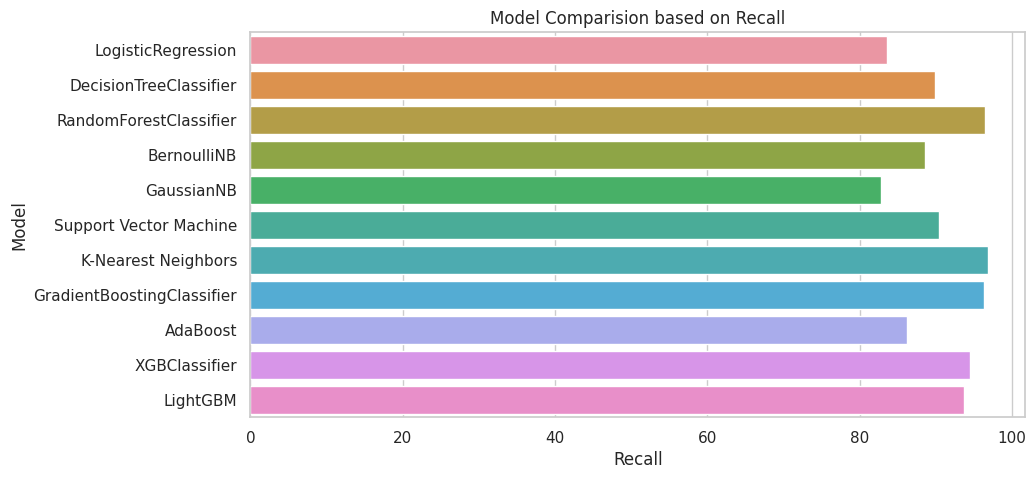

In [ ]:
plt.figure(figsize = (10 , 5))
# compare_classifiers = compare_classifiers.sort_values(by='Recall', ascending=True)
sns.barplot(y = "Model" , x = "Recall" , data = compare_classifiers)
plt.title("Model Comparision based on Recall");

# Visualising the ROC_AUC_SCORE and see which is greatest and most accurate to use.

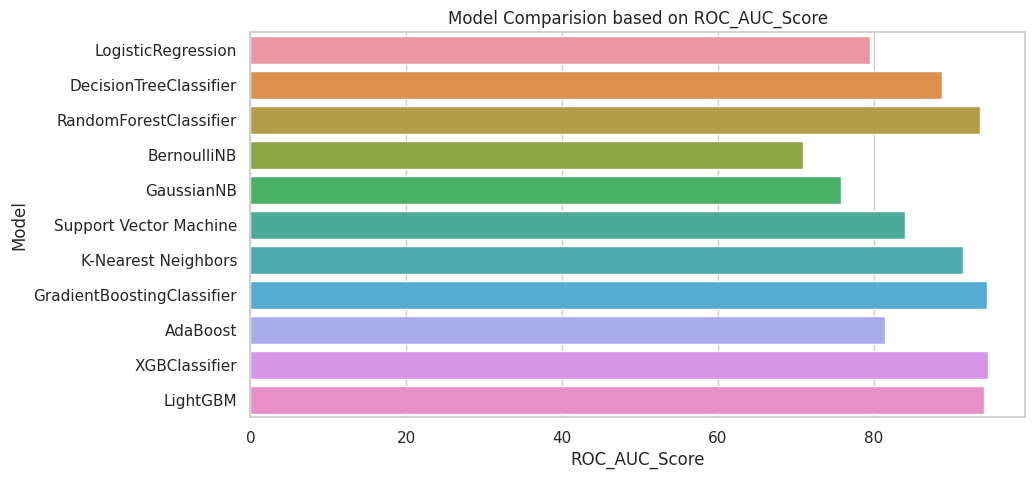

In [ ]:
plt.figure(figsize = (10 , 5))
# compare_classifiers = compare_classifiers.sort_values(by='F1_score', ascending=True)
sns.barplot(y = "Model" , x = "ROC_AUC_Score" , data = compare_classifiers)
plt.title("Model Comparision based on ROC_AUC_Score");

# Visualising the F1 score and see which is greatest and most accurate to use.

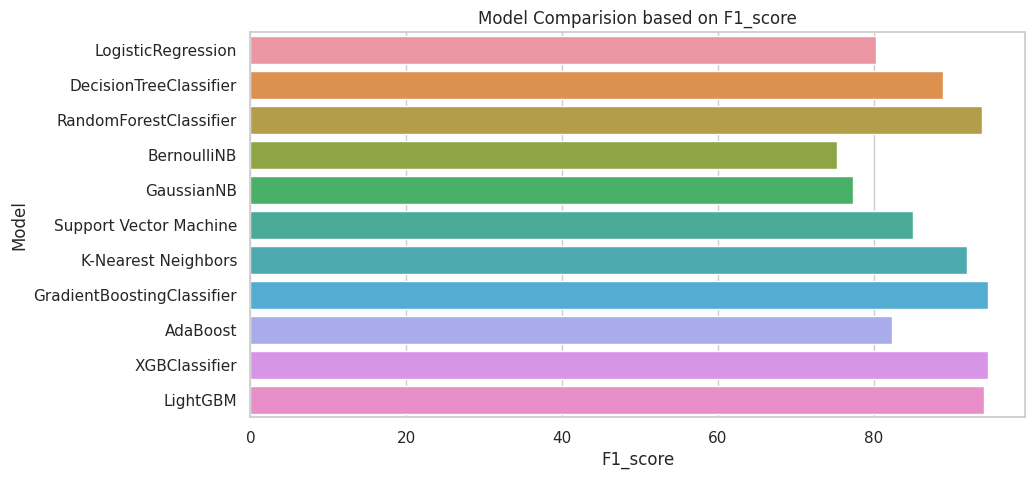

In [ ]:
plt.figure(figsize = (10 , 5))
# compare_classifiers = compare_classifiers.sort_values(by='F1_score', ascending=True)
sns.barplot(y = "Model" , x = "F1_score" , data = compare_classifiers)
plt.title("Model Comparision based on F1_score");

# Combining all the metrics used and looking for the correct models

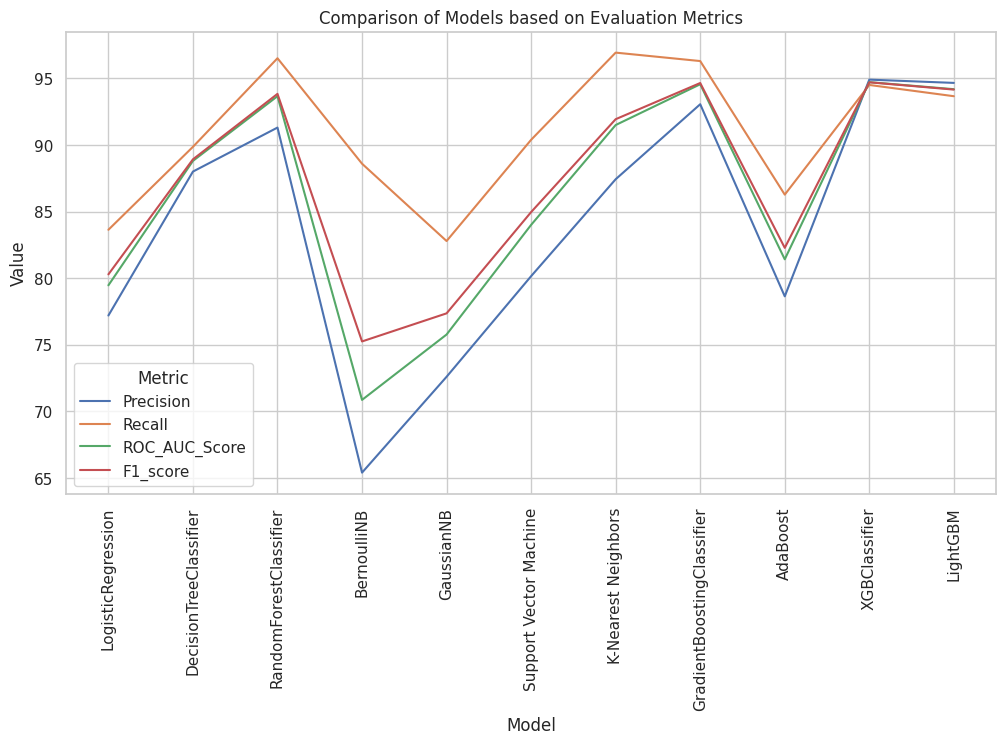

In [ ]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
melted_df = pd.melt(compare_classifiers, id_vars=['Model'], var_name='Metric', value_name='Value')
sns.lineplot(x='Model', y='Value', hue='Metric', data=melted_df)

plt.xticks(rotation=90)
plt.xlabel('Model')
plt.ylabel('Value')
plt.title('Comparison of Models based on Evaluation Metrics')
plt.show()

# **Confusion Matrix for Top4 Models**

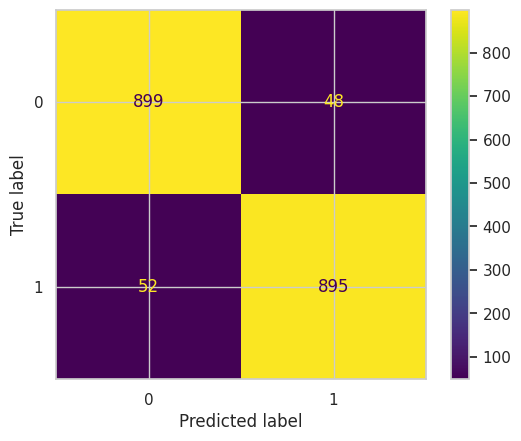

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train,y_train)
ConfusionMatrixDisplay.from_predictions(y_test, xgb_clf.predict(X_test))

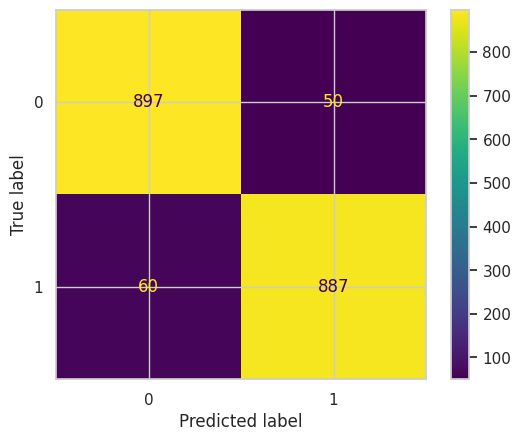

In [ ]:
lgbm_clf = lgb.LGBMClassifier()
lgbm_clf.fit(X_train,y_train)
ConfusionMatrixDisplay.from_predictions(y_test, lgbm_clf.predict(X_test))

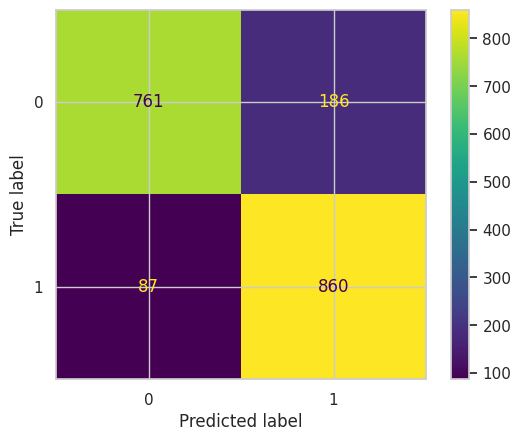

In [ ]:
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(X_train,y_train)
ConfusionMatrixDisplay.from_predictions(y_test, gbc_clf.predict(X_test))

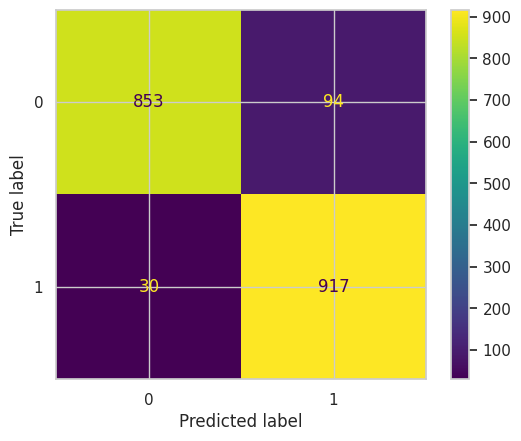

In [ ]:
rfc_clf = RandomForestClassifier()
rfc_clf.fit(X_train,y_train)
ConfusionMatrixDisplay.from_predictions(y_test, rfc_clf.predict(X_test))

# **Hypertuning of best 4 models which have high recall score**

# **Tuning XgBoost Classifier**

In [ ]:
tuned_validation_roc_auc_scores = []
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ,9],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [ ]:
xgb_ = XGBClassifier()
xgb_tuning = RandomizedSearchCV(xgb_, param_distributions = params, n_iter = 8, scoring = 'roc_auc', n_jobs = 1, cv = 5, verbose = 3)
xgb_tuning.fit(X_train , y_train)
xgb_tuning.best_estimator_
xgb_tuning.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=15, min_child_weight=5;, score=0.989 total time=   2.8s
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=15, min_child_weight=5;, score=0.988 total time=   0.6s
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=15, min_child_weight=5;, score=0.986 total time=   0.6s
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=15, min_child_weight=5;, score=0.990 total time=   0.6s
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=15, min_child_weight=5;, score=0.989 total time=   0.6s
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=6, min_child_weight=5;, score=0.983 total time=   0.3s
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=6, min_child_weight=5;, score=0.984 total time=   0.3s
[CV 3/5] END colsample_

{'min_child_weight': 5,
 'max_depth': 15,
 'learning_rate': 0.2,
 'gamma': 0.1,
 'colsample_bytree': 0.5}

In [ ]:
tuned_validation_roc_auc_scores.append(max(0,roc_auc_score(y_test, xgb_tuning.predict(X_test))))

In [ ]:
cv_score_xgb = max(0,roc_auc_score(y_test, xgb_tuning.predict(X_test)))

In [ ]:
tuned_validation_roc_auc_scores

[0.9487856388595566]

# **Tuning LGBM Classifier**

In [ ]:
lgb_ = lgb.LGBMClassifier()
lgb_tuning = RandomizedSearchCV(lgb_, param_distributions = params, n_iter = 8, scoring = 'roc_auc', n_jobs = 1, cv = 5, verbose = 3)
lgb_tuning.fit(X_train , y_train)
lgb_tuning.best_estimator_
lgb_tuning.best_params_
max(0,roc_auc_score(y_test, lgb_tuning.predict(X_test)))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[LightGBM] [Warning] Unknown parameter: gamma
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1;, score=0.970 total time=   0.1s
[LightGBM] [Warning] Unknown parameter: gamma
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1;, score=0.967 total time=   0.1s
[LightGBM] [Warning] Unknown parameter: gamma
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1;, score=0.960 total time=   0.1s
[LightGBM] [Warning] Unknown parameter: gamma
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1;, score=0.971 total time=   0.1s
[LightGBM] [Warning] Unknown parameter: gamma
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1;, score=0.959 total time=   0.1s
[LightGBM] [Warning] Unknown parameter: gamma
[CV 1/5] END c

0.9498416050686378

In [ ]:
lgb_tuning.best_params_

{'min_child_weight': 1,
 'max_depth': 15,
 'learning_rate': 0.3,
 'gamma': 0.3,
 'colsample_bytree': 0.5}

In [ ]:
cv_score_lgbm = max(0,roc_auc_score(y_test, lgb_tuning.predict(X_test)))
cv_score_lgbm

0.9498416050686378

# **Tuning Random Forest Classifier**

In [ ]:
param_dist = {
'n_estimators': list(range(10, 300, 5)),
'min_samples_leaf': list(range(1, 50)),
'max_depth': list(range(2, 30)),
'max_features': ['auto', 'sqrt'],
'bootstrap': [True, False]
}
rfc = RandomForestClassifier()
rfc_tuning = RandomizedSearchCV(rfc, param_distributions = param_dist, n_iter = 8, scoring = 'roc_auc', n_jobs = 1, cv = 5, verbose = 3)
rfc_tuning.fit(X_train , y_train)
rfc_tuning.best_estimator_
rfc_tuning.best_params_
max(0,roc_auc_score(y_test, rfc_tuning.predict(X_test)))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=23, n_estimators=255;, score=0.943 total time=   1.9s
[CV 2/5] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=23, n_estimators=255;, score=0.935 total time=   1.9s
[CV 3/5] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=23, n_estimators=255;, score=0.925 total time=   1.8s
[CV 4/5] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=23, n_estimators=255;, score=0.943 total time=   1.8s
[CV 5/5] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=23, n_estimators=255;, score=0.928 total time=   2.0s
[CV 1/5] END bootstrap=True, max_depth=26, max_features=sqrt, min_samples_leaf=36, n_estimators=10;, score=0.912 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=26, max_features=sqrt, min_samples_leaf=36, n_estimators=10;, score=0.897 total time=   0.1s
[CV 3/

0.912882787750792

In [ ]:
rfc_tuning.best_params_

{'n_estimators': 220,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': 14,
 'bootstrap': True}

# **Tuning  Gradient Boosting Classifier**

In [ ]:
params = {'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3], 
          'n_estimators': [50, 100, 150, 200, 250, 300],
          'max_depth': [3, 4, 5, 6, 7],
          'min_samples_split': [2, 4, 6, 8, 10],
          'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
          'max_features': ['sqrt', 'log2', None]}

gbc = GradientBoostingClassifier()

# Define the RandomizedSearchCV object with cross-validation
gbc_tuning = RandomizedSearchCV(gbc, param_distributions=params, n_iter = 8, scoring = 'roc_auc', n_jobs = 1, cv = 5, verbose = 3)
gbc_tuning.fit(X_train , y_train)

max(0,roc_auc_score(y_test, gbc_tuning.predict(X_test)))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_split=10, n_estimators=150, subsample=0.7;, score=0.976 total time=   0.9s
[CV 2/5] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_split=10, n_estimators=150, subsample=0.7;, score=0.970 total time=   0.8s
[CV 3/5] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_split=10, n_estimators=150, subsample=0.7;, score=0.965 total time=   0.9s
[CV 4/5] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_split=10, n_estimators=150, subsample=0.7;, score=0.977 total time=   0.8s
[CV 5/5] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_split=10, n_estimators=150, subsample=0.7;, score=0.972 total time=   0.8s
[CV 1/5] END learning_rate=0.15, max_depth=6, max_features=log2, min_samples_split=6, n_estimators=50, subsample=0.6;, score=0.958 total time=   0.3s
[CV 2/5] END learning_rate=0.15, ma

0.949313621964097

In [ ]:
gbc_tuning.best_params_

{'subsample': 1.0,
 'n_estimators': 250,
 'min_samples_split': 8,
 'max_features': 'sqrt',
 'max_depth': 7,
 'learning_rate': 0.15}

# **Confusion Matrix after Tuning the Parameters of Top4 Models**

In [ ]:
xgb_tuned = XGBClassifier(colsample_bytree = 0.5,gamma = 0.3,learning_rate =  0.25,max_depth = 12, min_child_weight = 1)
lgbm_tuned = lgb.LGBMClassifier(colsample_bytree = 0.3,learning_rate = 0.3,max_depth= 10,min_child_weight = 1)
gbc_tuned = GradientBoostingClassifier(learning_rate=0.2,max_depth=7,max_features='log2',n_estimators=200,subsample=0.9,min_samples_split=4)
rfc_tuned = RandomForestClassifier(bootstrap = False, max_depth = 18,max_features = 'auto',min_samples_leaf = 1, n_estimators = 40)

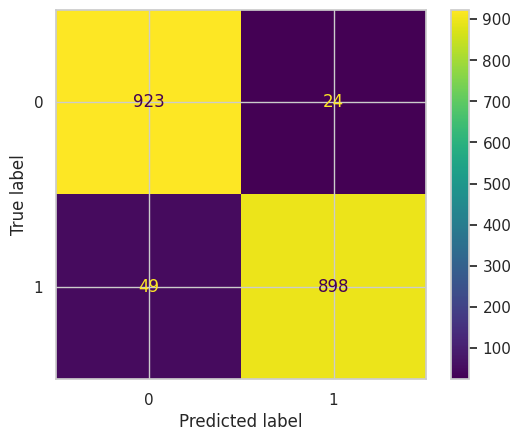

In [ ]:
xgb_tuned.fit(X_train,y_train)
ConfusionMatrixDisplay.from_predictions(y_test, xgb_tuned.predict(X_test))

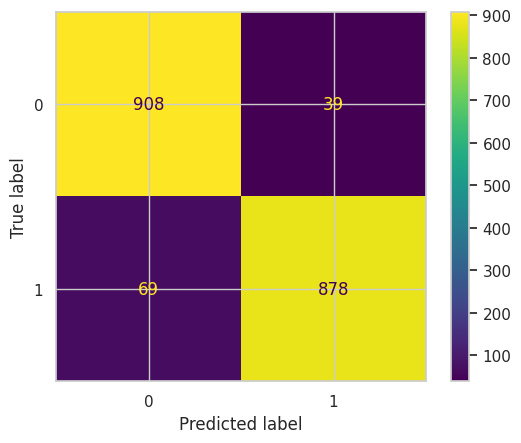

In [ ]:
lgbm_tuned.fit(X_train,y_train)
ConfusionMatrixDisplay.from_predictions(y_test, lgbm_tuned.predict(X_test))

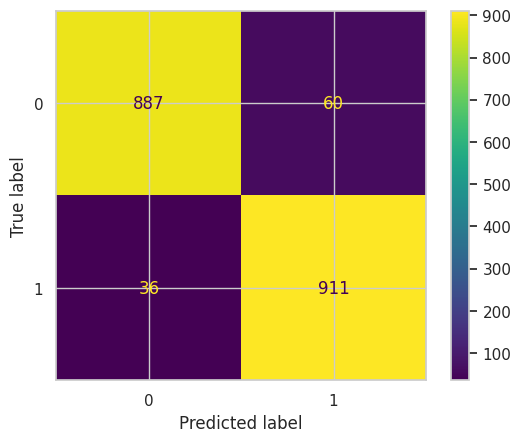

In [ ]:
gbc_tuned.fit(X_train,y_train)
ConfusionMatrixDisplay.from_predictions(y_test, gbc_tuned.predict(X_test))

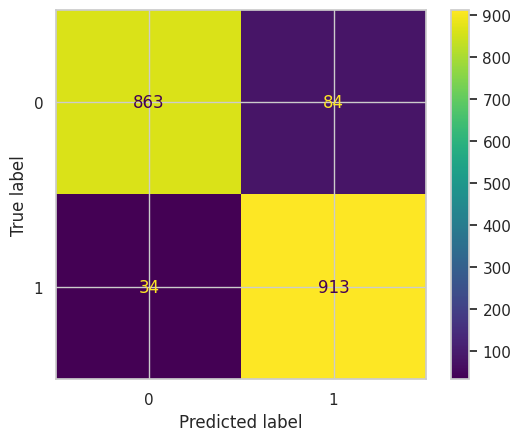

In [ ]:
rfc_tuned.fit(X_train,y_train)
ConfusionMatrixDisplay.from_predictions(y_test, rfc_tuned.predict(X_test))

# **n-fold cross validation on the selected models**

In [ ]:
def cross_validation(model, train_x, train_y, folds):
  mdl = model
  cv = RepeatedStratifiedKFold(n_splits= folds, n_repeats=1, random_state=42)
  scores_precision = cross_val_score(mdl, train_x, train_y, cv = cv, scoring = "precision")
  scores_recall    = cross_val_score(mdl, train_x, train_y, cv = cv, scoring = "recall")
  scores_roc_auc   = cross_val_score(mdl, train_x, train_y, cv = cv, scoring = "roc_auc")
  return scores_precision, scores_recall , scores_roc_auc

In [ ]:
train_x = pd.concat([X_train,X_test], axis = 0)
train_y = pd.concat([y_train,y_test], axis = 0)
folds = list(range(0,10))
cv_scores_precision_rfc, cv_scores_recall_rfc , cv_scores_roc_auc_rfc = cross_validation(RandomForestClassifier(n_estimators=50,n_jobs=-1), train_x, train_y,len(folds))
cv_scores_precision_knn, cv_scores_recall_knn , cv_scores_roc_auc_knn = cross_validation(KNeighborsClassifier(n_neighbors=1,algorithm='kd_tree',weights='uniform'), train_x, train_y,len(folds))
cv_scores_precision_gbc, cv_scores_recall_gbc , cv_scores_roc_auc_gbc = cross_validation(GradientBoostingClassifier(learning_rate=0.1,loss='exponential',max_depth=70,
                          max_features=2,n_estimators=300), train_x, train_y,len(folds))


def cross_validation_plotting(model_name,score,folds,scoring):
  plt.plot(folds,score)
  plt.xlabel("Fold number")
  plt.ylabel("Score of respective fold")
  plt.title("Cross Validation score on " + model_name + " based on " + scoring ,fontdict={'fontweight': 'bold', 'size':18})
  plt.show()
  print()
  print("Mean Cross Validation scores based on " + scoring + "  is : " + str(sum(score)/len(score)))
  print()

RFC

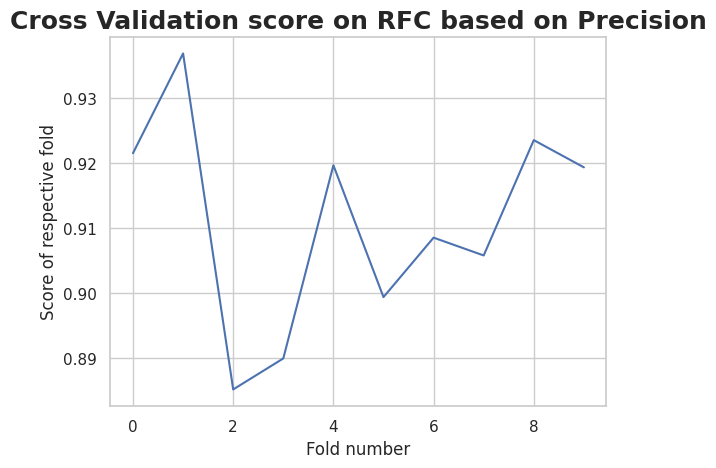


Mean Cross Validation scores based on Precision  is : 0.9109930496332834



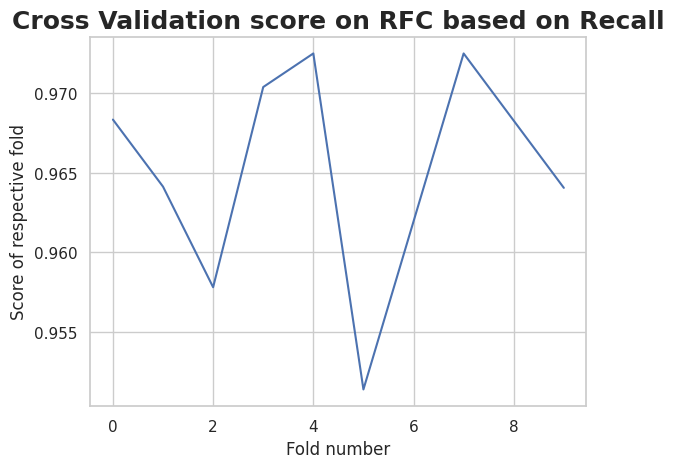


Mean Cross Validation scores based on Recall  is : 0.965139472440032



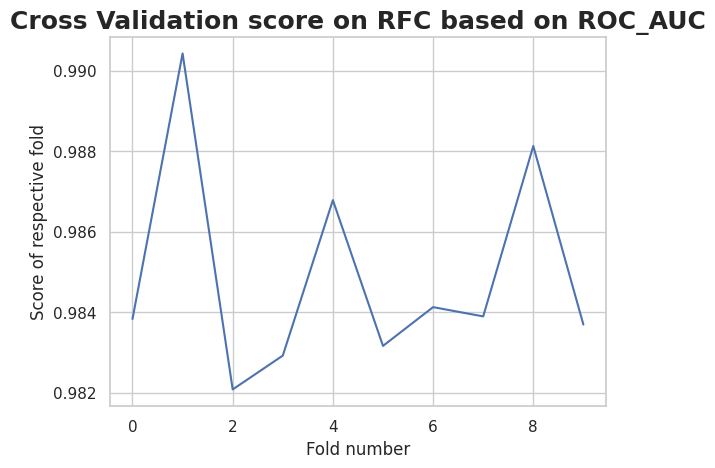


Mean Cross Validation scores based on ROC_AUC  is : 0.9849029184513143



In [ ]:
cross_validation_plotting("RFC",cv_scores_precision_rfc,folds,"Precision")
cross_validation_plotting("RFC",cv_scores_recall_rfc,folds,"Recall")
cross_validation_plotting("RFC",cv_scores_roc_auc_rfc,folds,"ROC_AUC")

KNN

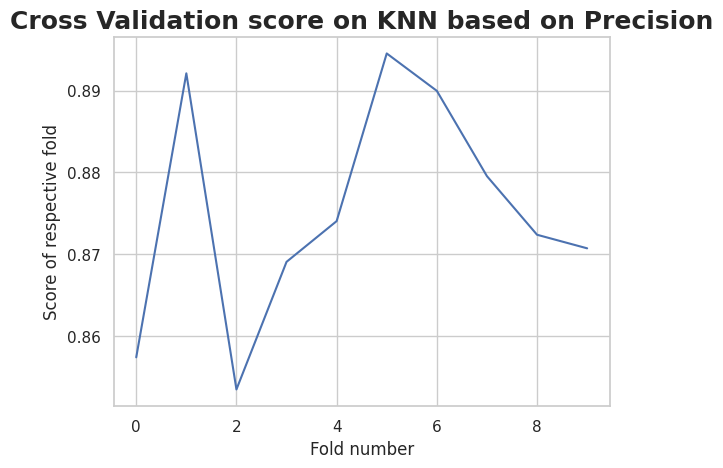


Mean Cross Validation scores based on Precision  is : 0.8753237213140329



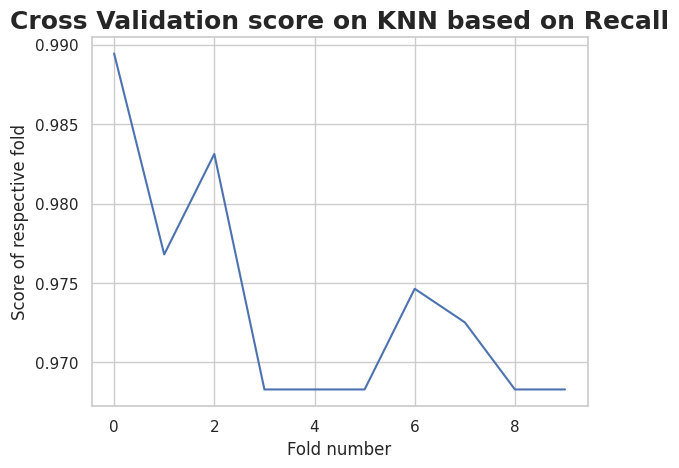


Mean Cross Validation scores based on Recall  is : 0.9737950598121337



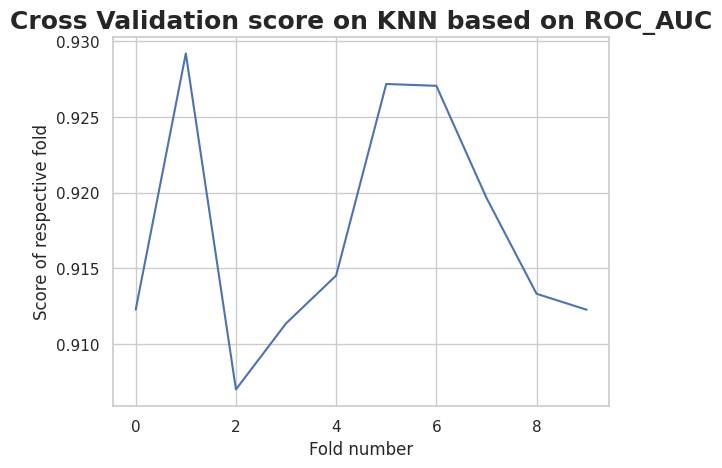


Mean Cross Validation scores based on ROC_AUC  is : 0.9173836540262797



In [ ]:
cross_validation_plotting("KNN",cv_scores_precision_knn,folds,"Precision")
cross_validation_plotting("KNN",cv_scores_recall_knn,folds,"Recall")
cross_validation_plotting("KNN",cv_scores_roc_auc_knn,folds,"ROC_AUC")

GBC

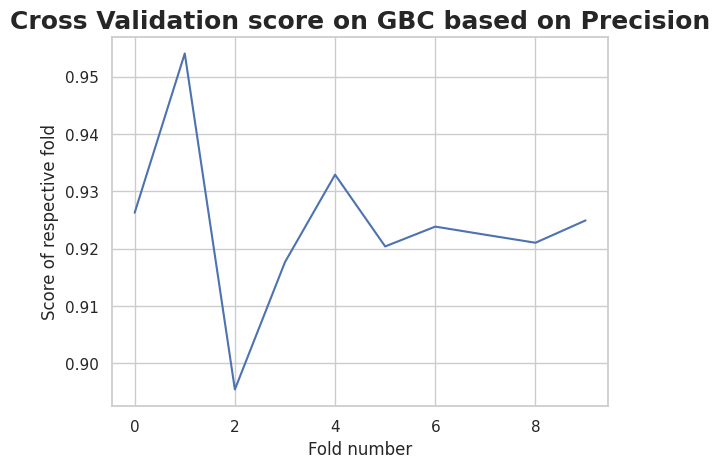


Mean Cross Validation scores based on Precision  is : 0.9239154202029474



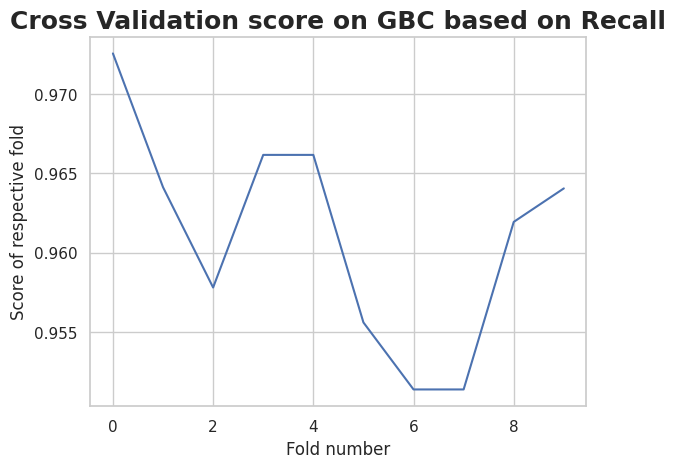


Mean Cross Validation scores based on Recall  is : 0.9611216670680903



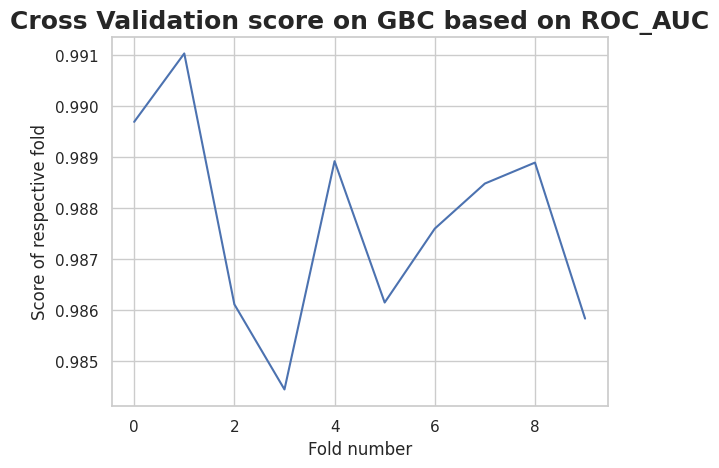


Mean Cross Validation scores based on ROC_AUC  is : 0.9877147524941314



In [ ]:
cross_validation_plotting("GBC",cv_scores_precision_gbc,folds,"Precision")
cross_validation_plotting("GBC",cv_scores_recall_gbc,folds,"Recall")
cross_validation_plotting("GBC",cv_scores_roc_auc_gbc,folds,"ROC_AUC")

# Selecting on the basis of ROC AUC Score

In [ ]:
cv_auc_roc_scores = []
cv_auc_roc_scores.append(sum(cv_scores_roc_auc_rfc)/ len(cv_scores_roc_auc_rfc))
cv_auc_roc_scores.append(sum(cv_scores_roc_auc_knn)/ len(cv_scores_roc_auc_knn))
cv_auc_roc_scores.append(sum(cv_scores_roc_auc_gbc)/ len(cv_scores_roc_auc_gbc))
cv_auc_roc_scores.append(cv_score_xgb)
cv_auc_roc_scores.append(cv_score_lgbm)

model_names = ['RandomForestClassifier', 'KNeighborsClassifier','GradientBoostingClassifier','XGBClassifier','LightGBM']
score = pd.DataFrame({'Model': model_names, 'Cross Validation AUC ROC Score':cv_auc_roc_scores})
score.style.background_gradient(high=1,axis=0)

,Model,Cross Validation AUC ROC Score
0,RandomForestClassifier,0.984903
1,KNeighborsClassifier,0.917384
2,GradientBoostingClassifier,0.987715
3,XGBClassifier,0.948786
4,LightGBM,0.949842


# **Majority Voting**

In [ ]:
def MajorityVoting(xgb_pred,lgbm_pred,gbc_pred,rfc_pred):
    final_prediction = []

    for iter in range(len(xgb_pred)):
      i = xgb_pred[iter]
      j = lgbm_pred[iter]
      k = gbc_pred[iter]
      l = rfc_pred[iter]

      zero = 0
      ones = 0

      if(i == 0):
        zero+=1
      elif(i==1):
        ones+=1

      if(j == 0):
        zero+=1
      elif(j==1):
        ones+=1

      if(k == 0):
        zero+=1
      elif(k==1):
        ones+=1

      if(l== 0):
        zero+=1
      elif(l==1):
        ones+=1

    
      if(zero > ones):
        final_prediction.append(0)
      
      if(ones > zero):
        final_prediction.append(1)

      if(zero == ones):
        final_prediction.append(1)
        if(i == 0):
          final_prediction.append(0)
        else:
          final_prediction.append(1)
      
    return final_prediction

def Scoring(final_prediction):
    score = max(0,100*roc_auc_score(y_test, final_prediction))
    return score

In [ ]:
xgbclassifier = XGBClassifier(colsample_bytree = 0.5,gamma = 0.3,learning_rate =  0.25,max_depth = 12, min_child_weight = 1)
lgbmclassifier = lgb.LGBMClassifier(colsample_bytree = 0.3,learning_rate = 0.3,max_depth= 10,min_child_weight = 1)
gbc = GradientBoostingClassifier(learning_rate=0.2,max_depth=7,max_features='log2',n_estimators=200,subsample=0.9,min_samples_split=4)
rfc = RandomForestClassifier(bootstrap = False, max_depth = 18,max_features = 'auto',min_samples_leaf = 1, n_estimators = 40)

rfc.fit(X_train , y_train)
rfc_pred = rfc.predict(X_test)

xgbclassifier.fit(X_train , y_train)
xgb_pred = xgbclassifier.predict(X_test)

gbc.fit(X_train , y_train)
gbc_pred = gbc.predict(X_test)

lgbmclassifier.fit(X_train , y_train)
lgbm_pred = lgbmclassifier.predict(X_test)

final_prediction = MajorityVoting(xgb_pred,lgbm_pred,gbc_pred,rfc_pred)
Scoring(final_prediction)

95.67053854276664

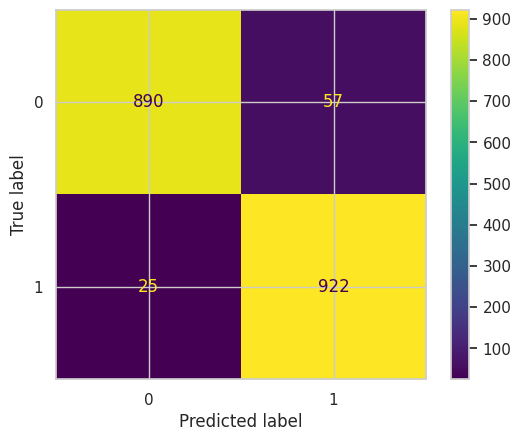

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, final_prediction)

# **Exporting the Models for backend using pickle library**

In [2]:
import pickle

with open('rfc_model.pkl', 'wb') as f:
    pickle.dump(rfc, f)
  
with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(xgbclassifier, f)

with open('gbc_model.pkl', 'wb') as f:
    pickle.dump(gbc, f)

with open('lgbm_model.pkl', 'wb') as f:
    pickle.dump(lgbmclassifier, f)